In [1]:
from typing_extensions import TypedDict

In [2]:
class State(TypedDict):
    graph_info:str 

In [3]:
def start_play(state:State):
    print("start_play node has been called")
    return {"graph_info":state['graph_info']+" I am planning to play"}

def cricket(state:State):
    print("My cricket node has been called")
    return {"graph_info":state['graph_info']+" cricket"}

def badminton(state:State):
    print("My badminton node has been called")
    return {"graph_info":state['graph_info']+" badminton"}

In [4]:
import random 
from typing import Literal

def random_play(state:State)->Literal['cricket','badminton']:
    graph_info=state['graph_info']

    if random.random()>0.5:
        return "cricket"
    else:
        return "badminton"

In [5]:
from langgraph.graph import StateGraph,START,END

In [6]:
# build graph
graph=StateGraph(State)

# adding the nodes 

graph.add_node("start_play",start_play)
graph.add_node("cricket",cricket)
graph.add_node("badminton",badminton)

# adding edges

graph.add_edge(START,"start_play")
graph.add_conditional_edges("start_play",random_play)
graph.add_edge("cricket",END)
graph.add_edge("badminton",END)

# compile the graph

graph_builder=graph.compile()

In [7]:
from IPython.display import Image, display 

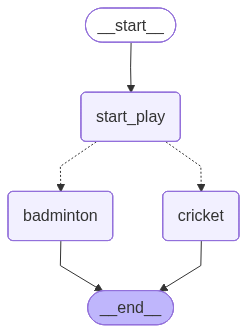

In [8]:
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [9]:
graph_builder.invoke({'graph_info':"Hey My name is vikas"})

start_play node has been called
My badminton node has been called


{'graph_info': 'Hey My name is vikas I am planning to play badminton'}